In [126]:
library(splines)
library(data.table)
library(ggplot2)

In [127]:
x = rnorm(1000, mean=10)
y = x^2 + 2*x^3 + 3*x^4
linear_spline = bs(x,knots=10, degree=1)
lm = lm(y ~ linear_spline)
predict = predict.lm(lm)
dt = data.table(x=x, y=y, predict=predict)

In [128]:
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.992   9.349  10.076  10.060  10.762  13.269 

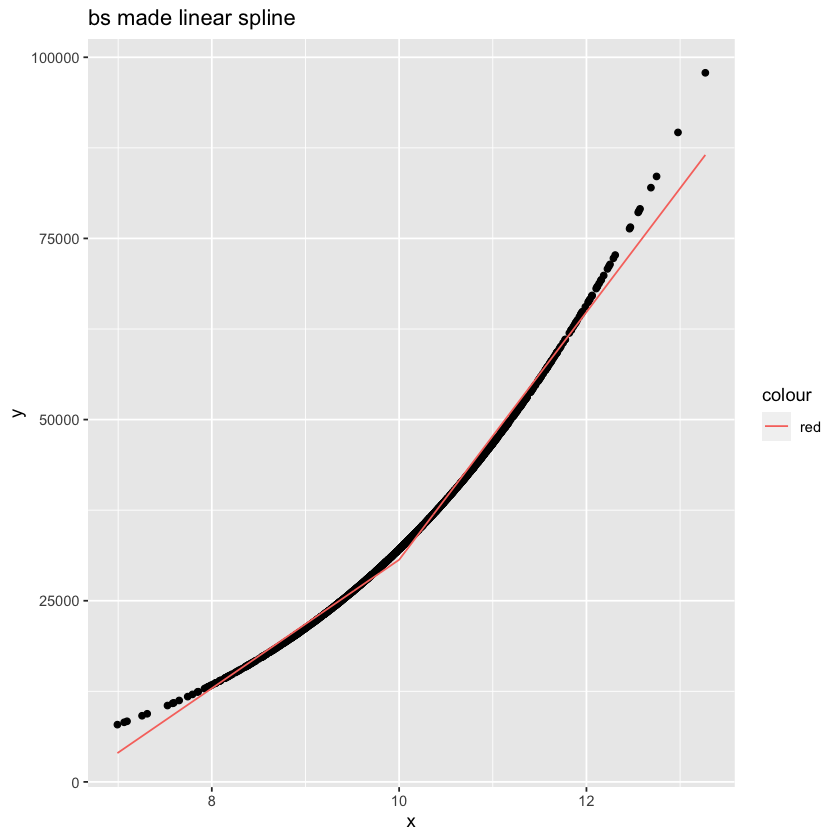

In [129]:
ggplot(dt) +
geom_point(aes(x, y)) +
geom_line(aes(x, predict, color="red")) + 
ggtitle("bs made linear spline")

In [130]:
x_spline = ifelse(x>=10, x-10, 0)
lm = lm(formula = y ~ x + x_spline)
predict = predict(lm)
dt = data.table(x=x,y=y,predict=predict)

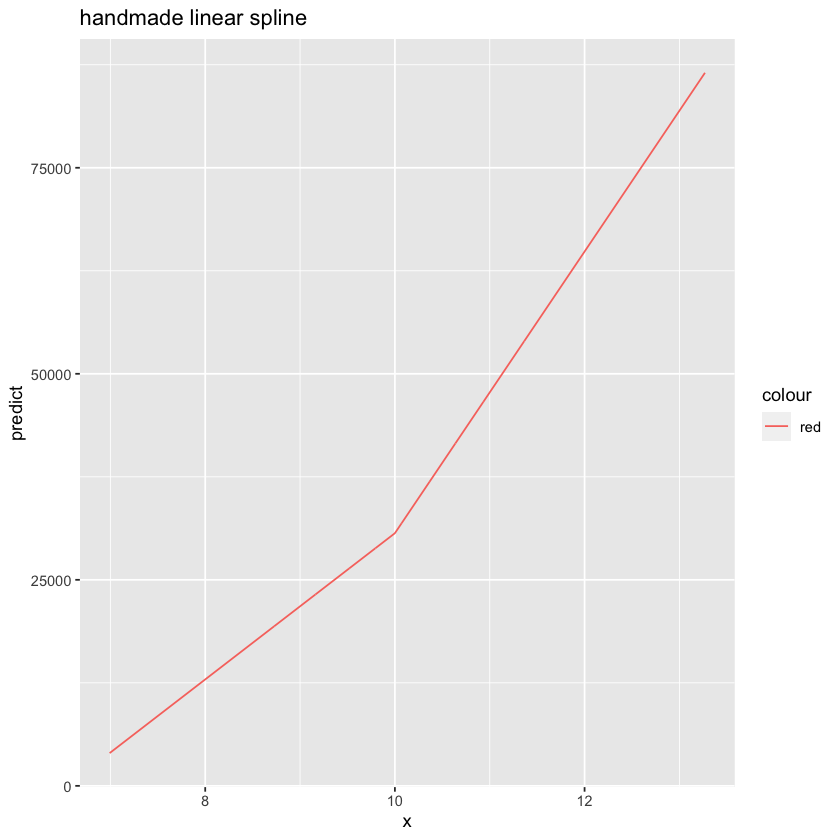

In [131]:
ggplot(dt) +
geom_line(aes(x, predict, color="red")) + 
ggtitle("handmade linear spline")

In [1]:
#a test to force derivative to 0 in edges. 
library(ggplot2)
library(mvtnorm)
## Set up a random set of parameters
beta <- rnorm(3)
vcv <- rWishart(1, 20, diag(c(.1, .001, .001), 3, 3))[,,1]

## Generate Monte Carlo draws
beta.hat <- rmvnorm(1000, beta, vcv)
xx <- seq(0, 40)
ww <- cbind(xx,1, ifelse(xx < 30, (xx - 10) * (xx >= 10), 20), ifelse(xx < 30, (xx - 20) * (xx >= 20), 10))

## Compute quantiles over draws
yy <- ww %*% t(beta.hat)
quants <- apply(yy, 1, function(y) quantile(y, c(.025, .5, .975)))

## Plot it
ggplot(data.frame(xx, yy=quants[2,], cihi=quants[1,], cilo=quants[3,]), aes(xx, yy)) +
  geom_line() + geom_ribbon(aes(ymin=cilo, ymax=cihi), alpha=.5) + theme_bw() +
  scale_x_continuous(expand=c(0, 0))

## Set up parameters for transformed vars.
beta2 <- c(beta, -sum(beta[-1]))
vcv2 <- rbind(cbind(vcv, -rowSums(vcv[,-1])),
              c(-rowSums(vcv[,-1]), sum(vcv[2:3,2:3])))
ww2 <- cbind(1, (xx - 10) * (xx >= 10), (xx - 20) * (xx >= 20), (xx - 30) * (xx >= 30))

## Draw Monte Carlos
beta.hat2 <- rmvnorm(1000, beta2, vcv2)
yy2 <- ww2 %*% t(beta.hat2)
quants2 <- apply(yy2, 1, function(y) quantile(y, c(.025, .5, .975)))

## Plot the comparison
ggplot(rbind(data.frame(xx, yy=quants[2,], cihi=quants[1,], cilo=quants[3,], panel='original'),
             data.frame(xx, yy=quants2[2,], cihi=quants2[1,], cilo=quants2[3,], panel='transformed')),
       aes(xx, yy, linetype=panel)) +
  geom_line() + geom_ribbon(aes(ymin=cilo, ymax=cihi), alpha=.5) + theme_bw() +
  scale_x_continuous(expand=c(0, 0))


ERROR: Error in rmvnorm(1000, beta, vcv): could not find function "rmvnorm"
